In [1]:
%matplotlib inline

In [2]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pylab
from matplotlib.patches import Rectangle

pylab.rcParams['figure.figsize'] = (10.0, 8.0)

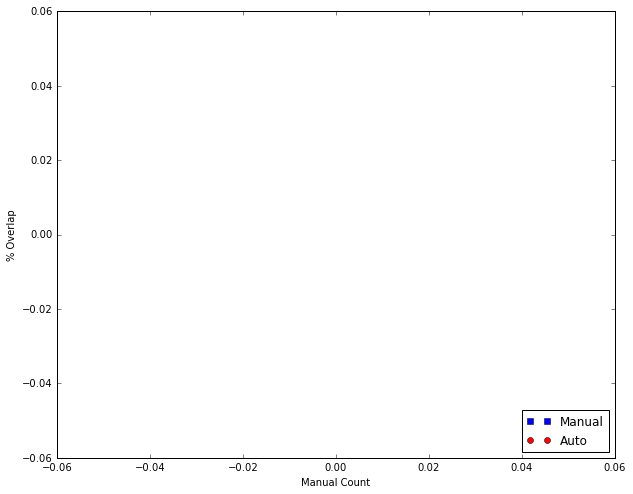

In [3]:
# -- PLOT NUMBER OF OVERLAPPED OBJECTS / TOTAL --------------------------------

file_path = os.listdir('.')
manual_feat = []
manual_overlap = []
auto_overlap = []
image = []
for infile in file_path:
    if 'MCT_AgNOR' in infile and '_SUMMARY.txt' in infile:
        f = open(infile, 'r')
        for line in f:
            words = line.split()
            if '.tif' in line:
                image.append(line)
            elif '# of Manual Cells\t' in line:
                manual_feat.append(words[4])
            elif '# of Overlapping Manual Cells\t' in line:
                manual_overlap.append(words[5])
            elif '# of Overlapping Automatic Cells\t' in line:
                auto_overlap.append(words[5])

manual_overlap_over_features = []
auto_overlap_over_features = []

for i in range(len(manual_overlap)):
    if int(manual_feat[i]) != 0:
        manual_div = float(manual_overlap[i])/float(manual_feat[i])
        auto_div = float(auto_overlap[i])/float(manual_feat[i])
        
        manual_overlap_over_features.append(manual_div)
        auto_overlap_over_features.append(auto_div)
    else:
        manual_overlap_over_features.append(0)
        auto_overlap_over_features.append(0)

plt.plot(manual_feat, manual_overlap_over_features, 'bs', label="Manual")
plt.plot(manual_feat, auto_overlap_over_features, 'ro', label="Auto")
plt.legend(loc='lower right')
plt.xlabel('Manual Count')
plt.ylabel('% Overlap')
plt.show()

In [4]:
# ---- initializing lists to later create xy plot of dcpah vs quhant scores ---------

final_ave = []
final_min = []
final_max = []

DCPAH_SCORES = []

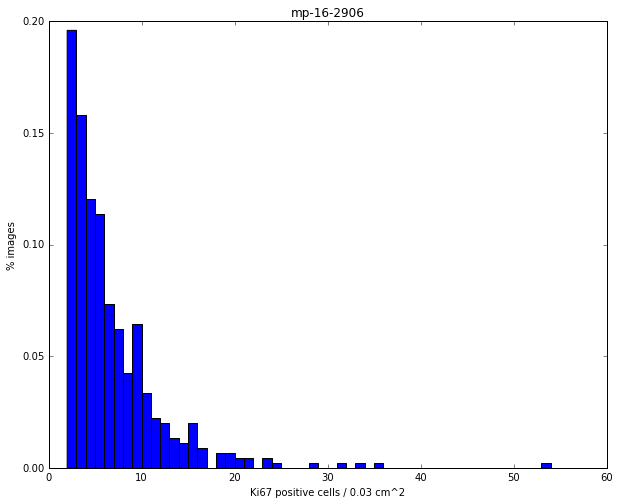

In [5]:
# ---------- DISTRIBUTION ---- 2906 ---------------------------

feat2906 = []
f = open('final2.txt', 'r')
for line in f:
    if '.tif' in line:
        words = line.split()
        if int(words[1]) > 1 and '2906' in line:
            if words[0] in open('2906_high_intensity.txt').read():
                feat2906.append(float(words[1]))
            elif words[0] in open('2906_med_intensity.txt').read():
                feat2906.append(float(words[1]))
            elif words[0] in open('2906_low_intensity.txt').read():
                feat2906.append(float(words[1]))
            elif words[0] in open('2906_poor_quality.txt').read():
                feat2906.append(float(words[1]))
            elif words[0] in open('2906_low_intensity_poor.txt').read():
                feat2906.append(float(words[1]))
       
    
fig = plt.figure()
plt.hist(feat2906, bins=np.arange(min(feat2906), max(feat2906)+1, 1), normed=True)
plt.xlabel('Ki67 positive cells / 0.03 cm^2')
plt.ylabel('% images')
#plt.yticks(np.arange(0, 100, 10))
#plt.xticks(np.arange(0, max(feat2906)+1, 10))
plt.title('mp-16-2906')
fig.savefig('2906-distribution.png')

##RN
# Show y-axis as % 
# Label y = % images
#label x = Ki67 positive cells / X cm^2
# Main label = mp-16-2906
# export as png

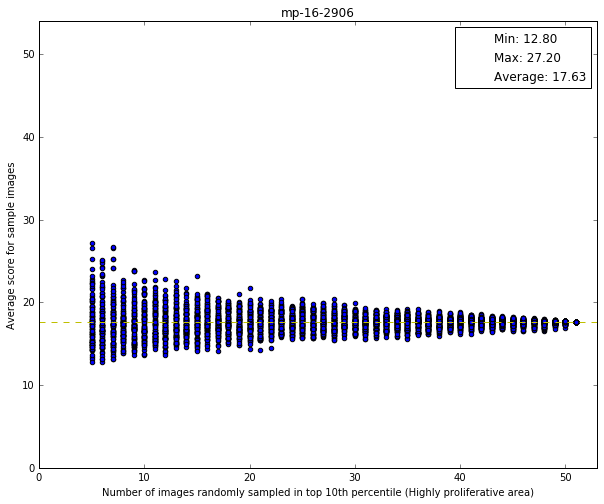

In [6]:
#--------------- SCATTER - 2906 -----------------------------------

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat2906:
    if i >= np.percentile(feat2906, percentile_thresh):
        high_per.append(i)
    
    
fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('mp-16-2906')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))
fig.savefig('2906-scatter.png')

final_ave.append(final_average)
final_min.append(min(min_max_array))
final_max.append(max(min_max_array))

##RN
#Show y-axis as % 
# Label y = % images
#label x = Number of images randomly sampled in top 10th percentile (Highly proliferative area)
#Main label = mp-16-2906
# Show inside plot min/max/average
# Add dashed line at average
#export as png

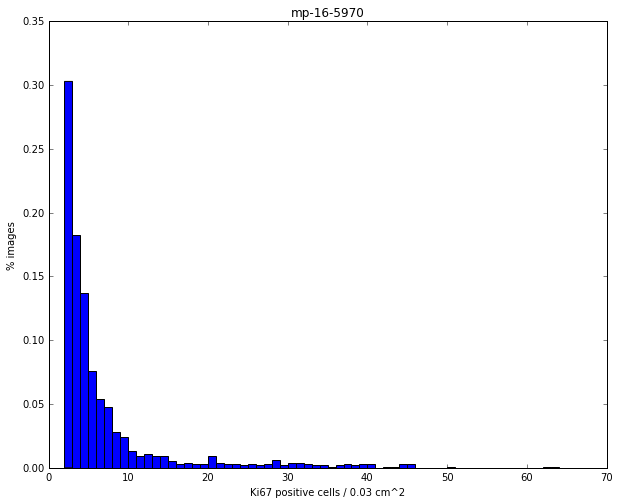

In [7]:
# ---------- DISTRIBUTION -------- 5970 ---------------------------

feat5970 = []
f = open('final2.txt', 'r')
for line in f:
    if '.tif' in line:
        words = line.split()
        if int(words[1]) > 1 and '5970' in line:
            if words[0] in open('5970_high_intensity.txt').read():
                feat5970.append(float(words[1]))
            elif words[0] in open('5970_med_intensity.txt').read():
                feat5970.append(float(words[1]))
            elif words[0] in open('5970_low_intensity.txt').read():
                feat5970.append(float(words[1]))
            elif words[0] in open('5970_poor_quality.txt').read():
                feat5970.append(float(words[1]))
            elif words[0] in open('5970_low_intensity_poor.txt').read():
                feat5970.append(float(words[1]))
                
fig = plt.figure()                       
plt.hist(feat5970, bins=np.arange(min(feat5970), max(feat5970)+1, 1), normed=True)
plt.title('mp-16-5970')
plt.xlabel('Ki67 positive cells / 0.03 cm^2')
plt.ylabel('% images')
fig.savefig('5970-distribution.png')

##RN
#Same as above

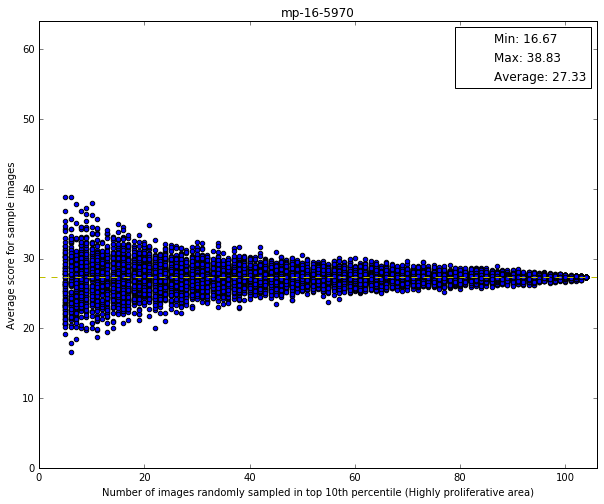

In [8]:
#--------------- AVERAGE SCATTER PLOT - 5970 -----------------------------------

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat5970:
    if i >= np.percentile(feat5970, percentile_thresh):
        high_per.append(i)
        
fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('mp-16-5970')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))
fig.savefig('5970-scatter.png')

final_ave.append(final_average)
final_min.append(min(min_max_array))
final_max.append(max(min_max_array))

##RN
#same as above

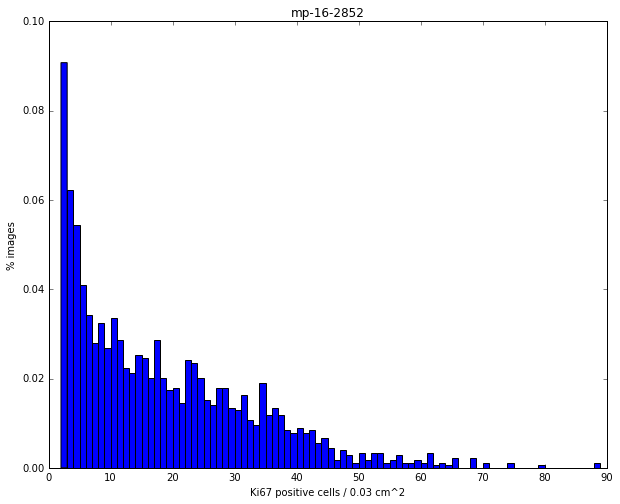

In [9]:
# ---------- DISTRIBUTION -- 2852 -----------------------
feat2852 = []
f = open('final2.txt', 'r')
for line in f:
    if '.tif' in line:
        words = line.split()
        if int(words[1]) > 1 and '2852' in line:
            feat2852.append(float(words[1]))
            
fig = plt.figure()
plt.hist(feat2852, bins=np.arange(min(feat2852), max(feat2852)+1, 1), normed=True)
plt.title('mp-16-2852')
plt.xlabel('Ki67 positive cells / 0.03 cm^2')
plt.ylabel('% images')
fig.savefig('2852-distribution.png')

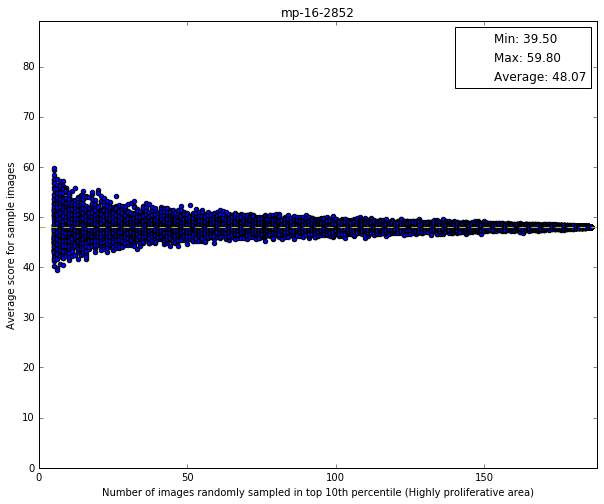

In [10]:
# ------------- 2852 -- SCATTER PLOT ---------------------
percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat2852:
    if i >= np.percentile(feat2852, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('mp-16-2852')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))
fig.savefig('2852-scatter.png')

final_ave.append(final_average)
final_min.append(min(min_max_array))
final_max.append(max(min_max_array))

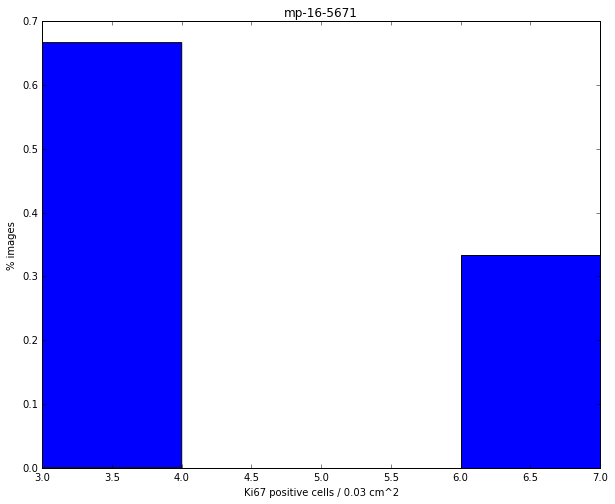

In [11]:
#------------ DISTRIBUTION -- 5671 -----------------------------------------

feat5671 = []
f = open('final2.txt', 'r')
for line in f:
    if '.tif' in line:
        words = line.split()
        if int(words[1]) > 1 and '5671_MCT' in line:
            feat5671.append(float(words[1]))
            
fig = plt.figure()
plt.hist(feat5671, bins=np.arange(min(feat5671), max(feat5671)+1, 1), normed=True)
plt.title('mp-16-5671')
plt.xlabel('Ki67 positive cells / 0.03 cm^2')
plt.ylabel('% images')
fig.savefig('5671-distribution.png')

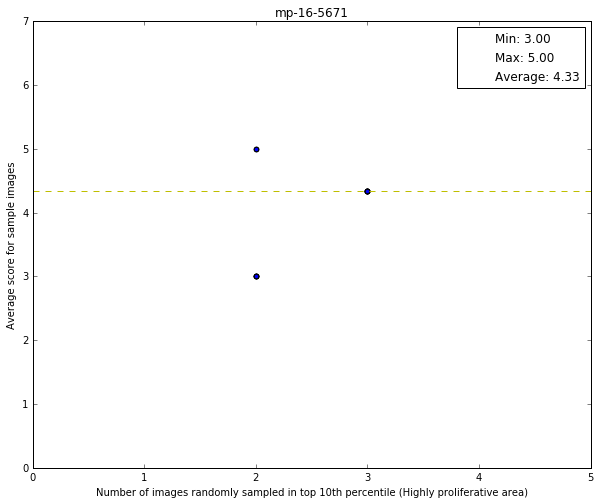

In [12]:
# ------------- 5671 -- SCATTER PLOT ---------------------
percentile_thresh = 0
num_tests = 10
high_per = []
average_sampling = []
start_size = 2

for i in feat5671:
    if i >= np.percentile(feat5671, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('mp-16-5671')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-1):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-2:
            final_average = average
    start_size+=1
    
plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))
fig.savefig('5671-scatter.png')


final_ave.append(final_average)
final_min.append(min(min_max_array))
final_max.append(max(min_max_array))

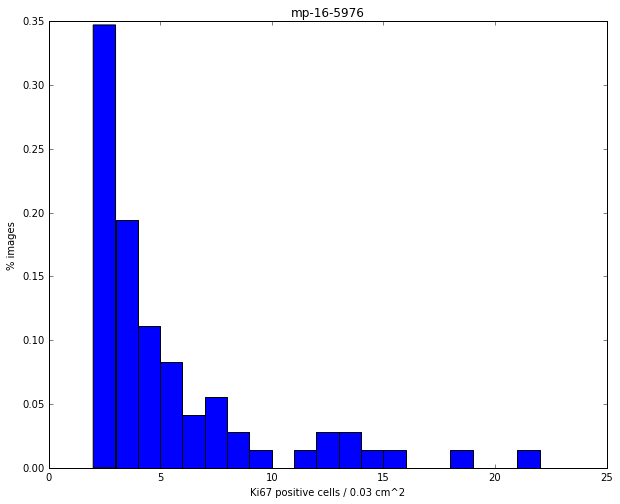

In [13]:
#------------ DISTRIBUTION -- 5976 -----------------------------------------

feat5976 = []
f = open('final.txt', 'r')
for line in f:
    if '.tif' in line:
        words = line.split()
        if int(words[1]) > 1:
            feat5976.append(float(words[1]))

fig = plt.figure()
plt.hist(feat5976, bins=np.arange(min(feat5976), max(feat5976)+1, 1), normed=True)
plt.title('mp-16-5976')
plt.xlabel('Ki67 positive cells / 0.03 cm^2')
plt.ylabel('% images')
fig.savefig('5976-distribution.png')

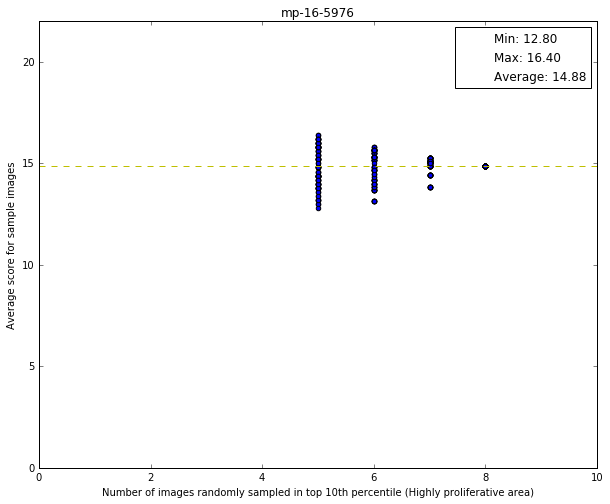

In [14]:
# ------------- 5976 -------- SCATTER PLOT ---------------------
percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat5976:
    if i >= np.percentile(feat5976, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('mp-16-5976')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))
fig.savefig('5976-scatter.png')

final_ave.append(final_average)
final_min.append(min(min_max_array))
final_max.append(max(min_max_array))

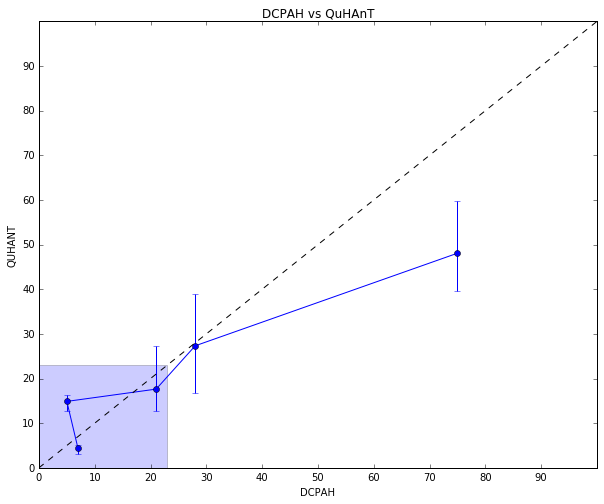

In [15]:
# --------------- XY PLOT ---- DCPAH SCORES VS QUHANT SCORES ----- INCLUDE CONFIDENCE MEASURES (MIN/MAX)-------
from pylab import *

final_ave = sorted(final_ave)
final_min = sorted(final_min)
final_max = sorted(final_max)

error_min = [b-a for a,b in zip(final_min, final_ave)]
error_max = [b-a for a,b in zip(final_ave, final_max)]
DCPAH_SCORES = [7,5,21,28,75]

fig = plt.figure()
plt.errorbar(DCPAH_SCORES, final_ave, yerr=[error_min, error_max], label="quhant")
plt.plot(DCPAH_SCORES, final_ave, 'bo', label='quhant')
plt.plot([0, 100], [0, 100], 'k--')
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 100, 10))
plt.title('DCPAH vs QuHAnT')
plt.xlabel('DCPAH'), plt.ylabel('QUHANT')
fill([0,23,23,0], [23,23,0,0], 'b', alpha=0.2)
fig.savefig('dcpah_plot.png')
#Let's pull out some of those images for the highest scoring tissue to show Matti and see what we missed.

In [16]:
#------------ GET ALL TISSUES INTO LISTS ------------------------------------------

feat197236 = []
feat197458 = []
feat197465 = []
feat197472 = []
feat197526 = []
feat197540 = []
feat197557 = []
feat207492 = []
feat207508 = []
feat207515 = []
feat207522 = []
feat207621 = []
feat207935 = []
feat207966 = []
feat207973 = []
feat207980 = []
feat207997 = []
feat208000 = []
feat208291 = []
feat208352 = []
feat208369 = []
feat208536 = []
featND = []
f = open('final4.txt', 'r')
for line in f:
    if '.tif' in line:
        words = line.split()
        if int(words[1]) > 1:
            if '197236' in words[0]:
                feat197236.append(int(words[1]))
            elif '197458' in words[0]:
                feat197458.append(int(words[1]))
            elif '197465' in words[0]:
                feat197465.append(int(words[1]))
            elif '197472' in words[0]:
                feat197472.append(int(words[1]))
            elif '197526' in words[0]:
                feat197526.append(int(words[1]))
            elif '197540' in words[0]:
                feat197540.append(int(words[1]))
            elif '197557' in words[0]:
                feat197557.append(int(words[1]))
            elif '207492' in words[0]:
                feat207492.append(int(words[1]))
            elif '207508' in words[0]:
                feat207508.append(int(words[1]))
            elif '207515' in words[0]:
                feat207515.append(int(words[1]))
            elif '207522' in words[0]:
                feat207522.append(int(words[1]))
            elif '207621' in words[0]:
                feat207621.append(int(words[1]))
            elif '207935' in words[0]:
                feat207935.append(int(words[1]))
            elif '207966' in words[0]:
                feat207966.append(int(words[1]))
            elif '207973' in words[0]:
                feat207973.append(int(words[1]))
            elif '207980' in words[0]:
                feat207980.append(int(words[1]))
            elif '207997' in words[0]:
                feat207997.append(int(words[1]))
            elif '208000' in words[0]:
                feat208000.append(int(words[1]))
            elif '208291' in words[0]:
                feat208291.append(int(words[1]))
            elif '208352' in words[0]:
                feat208352.append(int(words[1]))
            elif '208369' in words[0]:
                feat208369.append(int(words[1]))
            elif '208536' in words[0]:
                feat208536.append(int(words[1]))
            else:
                featND.append(int(words[1]))

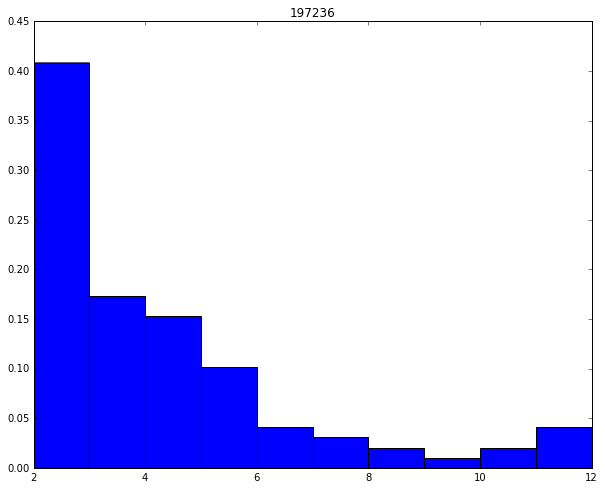

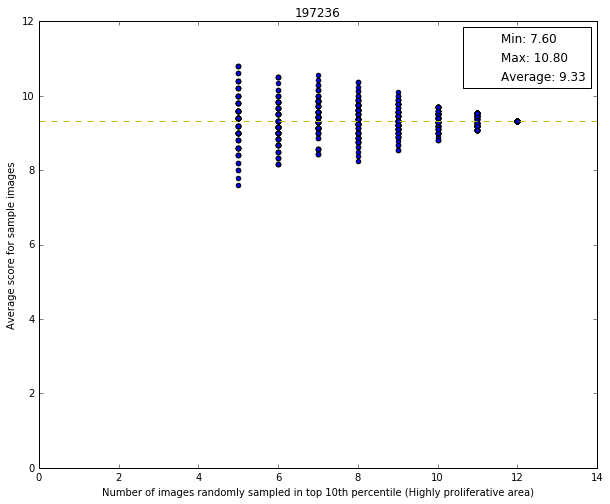

In [17]:
plt.hist(feat197236, bins=np.arange(min(feat197236), max(feat197236)+1, 1), normed=True)
plt.title('197236')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat197236:
    if i >= np.percentile(feat197236, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('197236')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

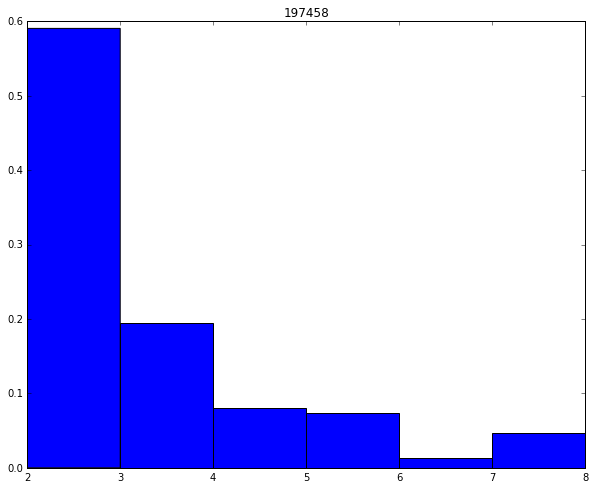

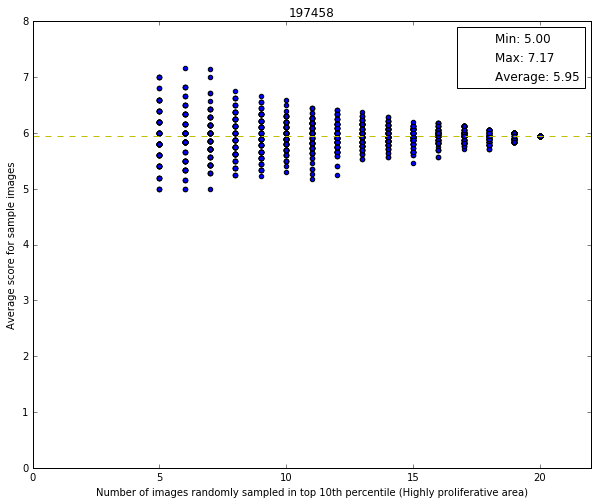

In [18]:
plt.hist(feat197458, bins=np.arange(min(feat197458), max(feat197458)+1, 1), normed=True)
plt.title('197458')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat197458:
    if i >= np.percentile(feat197458, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('197458')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

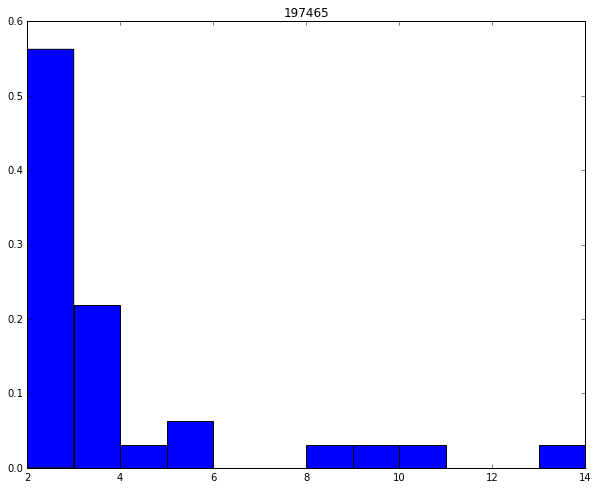

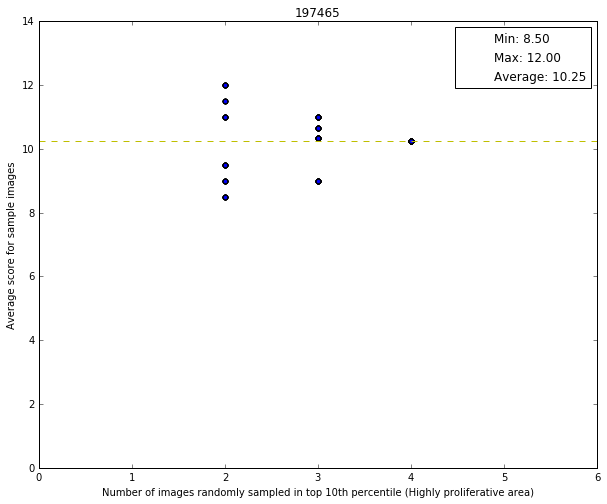

In [19]:
plt.hist(feat197465, bins=np.arange(min(feat197465), max(feat197465)+1, 1), normed=True)
plt.title('197465')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 2

for i in feat197465:
    if i >= np.percentile(feat197465, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('197465')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0


for i in range(len(high_per)-1):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-2:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

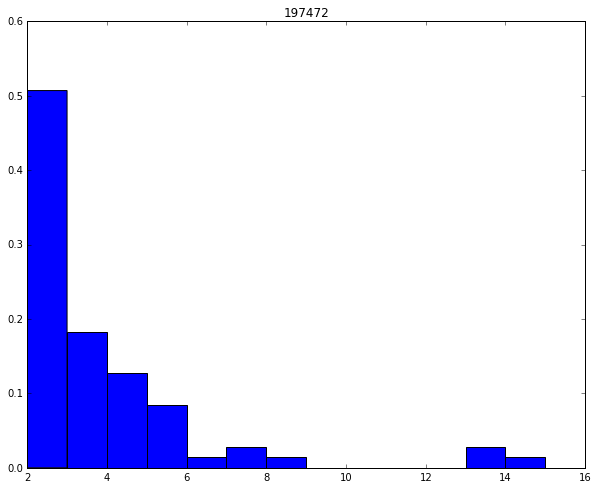

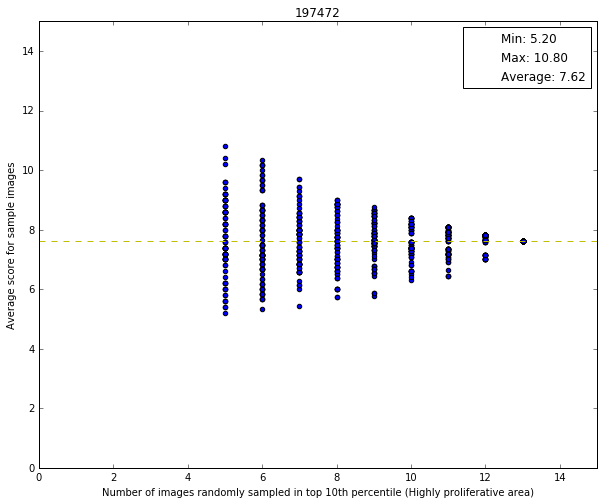

In [20]:
plt.hist(feat197472, bins=np.arange(min(feat197472), max(feat197472)+1, 1), normed=True)
plt.title('197472')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat197472:
    if i >= np.percentile(feat197472, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('197472')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

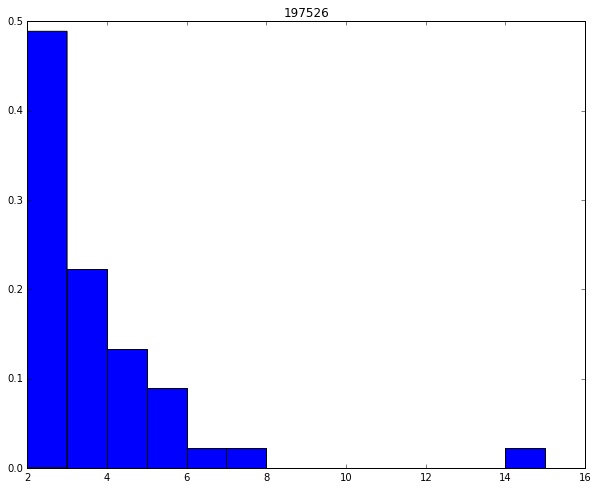

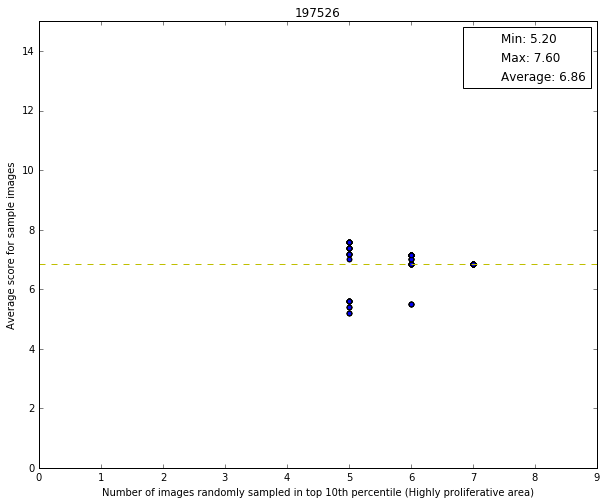

In [21]:
plt.hist(feat197526, bins=np.arange(min(feat197526), max(feat197526)+1, 1), normed=True)
plt.title('197526')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat197526:
    if i >= np.percentile(feat197526, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('197526')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

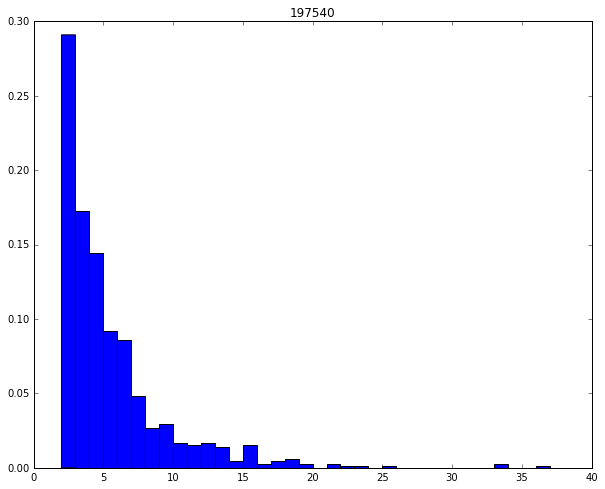

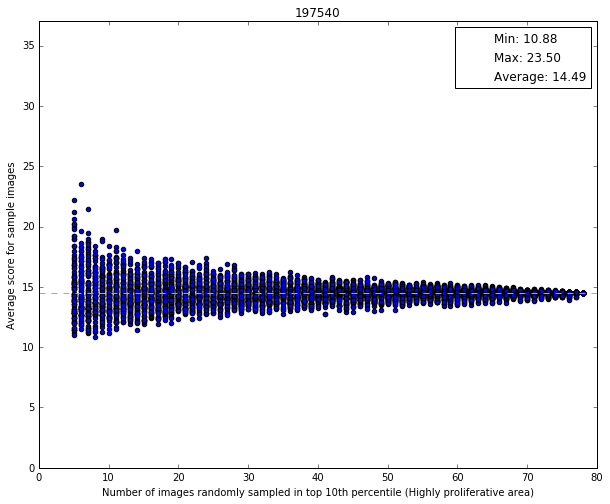

In [22]:
plt.hist(feat197540, bins=np.arange(min(feat197540), max(feat197540)+1, 1), normed=True)
plt.title('197540')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat197540:
    if i >= np.percentile(feat197540, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('197540')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

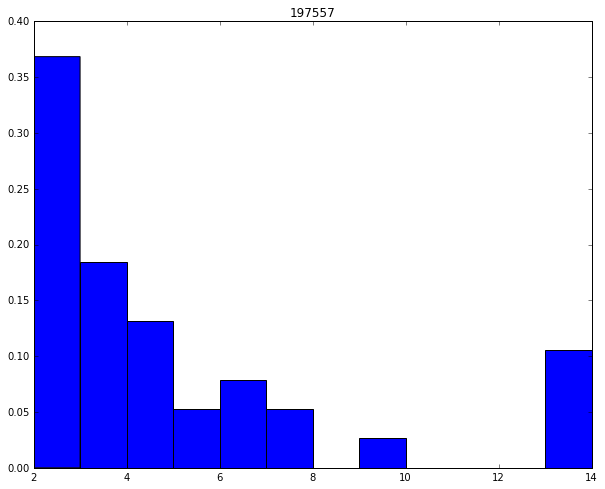

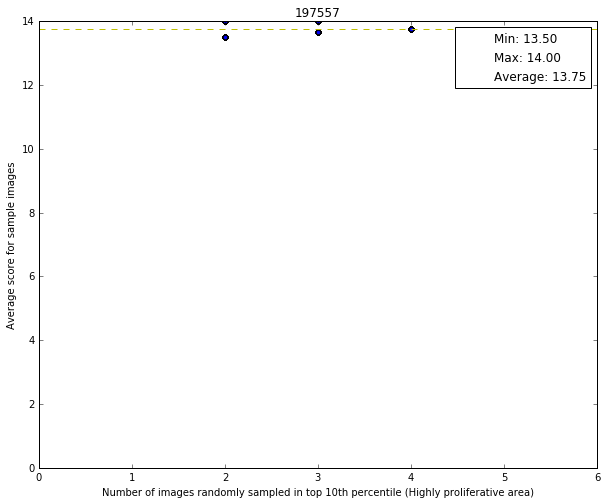

In [23]:
plt.hist(feat197557, bins=np.arange(min(feat197557), max(feat197557)+1, 1), normed=True)
plt.title('197557')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 2

for i in feat197557:
    if i >= np.percentile(feat197557, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('197557')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-1):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-2:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

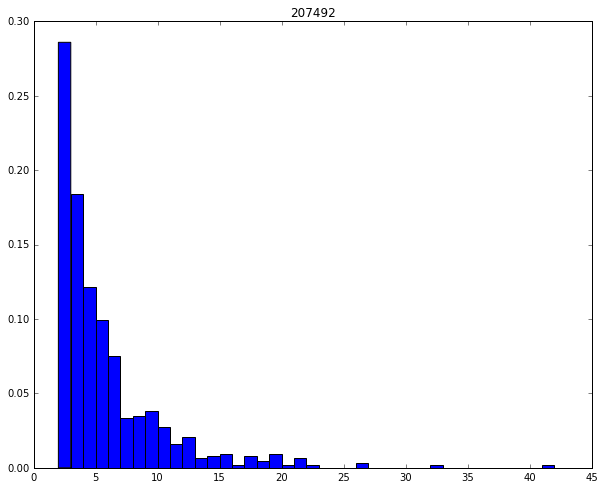

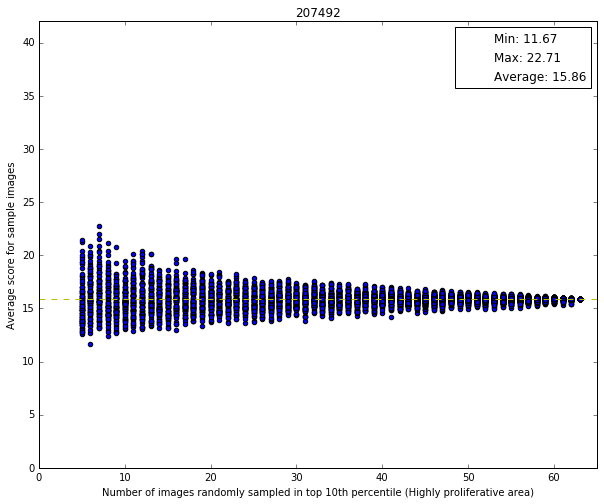

In [24]:
plt.hist(feat207492, bins=np.arange(min(feat207492), max(feat207492)+1, 1), normed=True)
plt.title('207492')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat207492:
    if i >= np.percentile(feat207492, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('207492')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

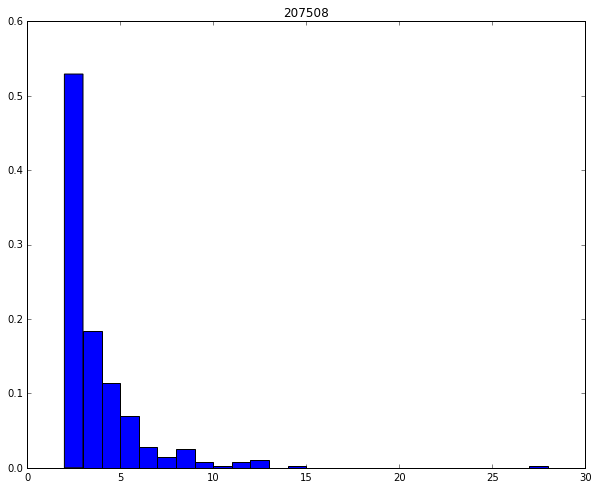

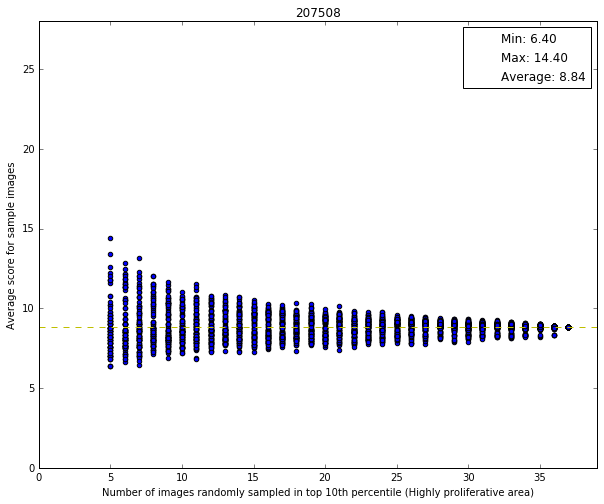

In [25]:
plt.hist(feat207508, bins=np.arange(min(feat207508), max(feat207508)+1, 1), normed=True)
plt.title('207508')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat207508:
    if i >= np.percentile(feat207508, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('207508')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

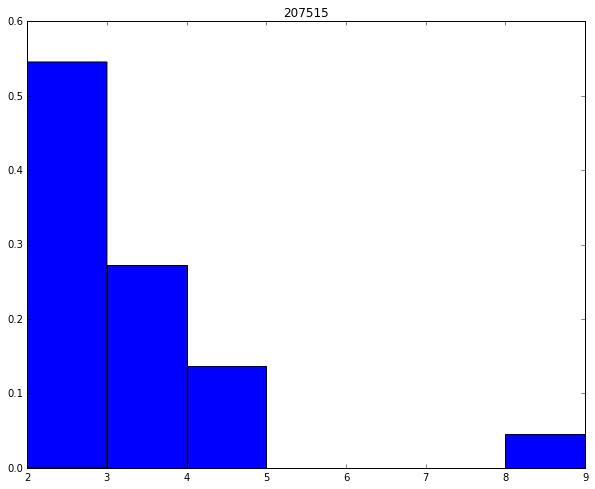

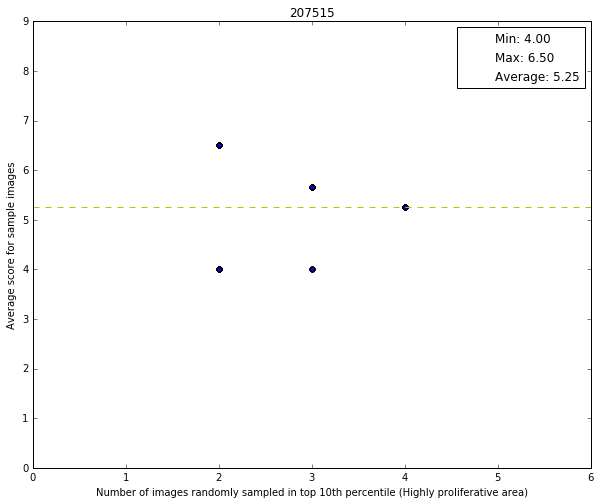

In [26]:
plt.hist(feat207515, bins=np.arange(min(feat207515), max(feat207515)+1, 1), normed=True)
plt.title('207515')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 2

for i in feat207515:
    if i >= np.percentile(feat207515, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('207515')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-1):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-2:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

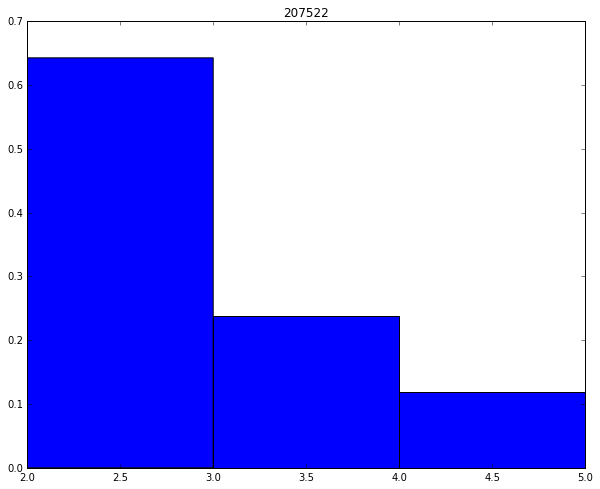

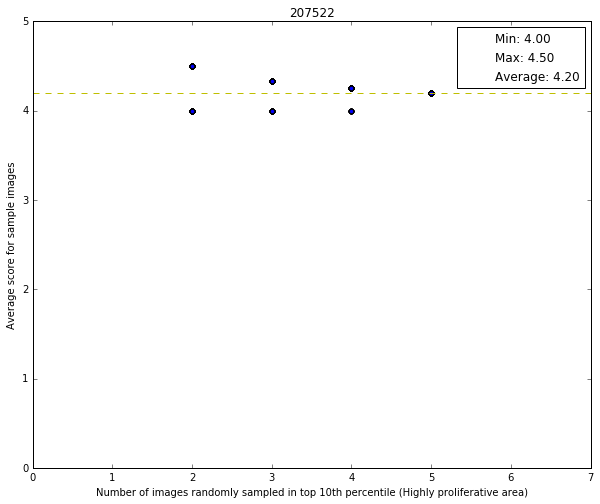

In [27]:
plt.hist(feat207522, bins=np.arange(min(feat207522), max(feat207522)+1, 1), normed=True)
plt.title('207522')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 2

for i in feat207522:
    if i >= np.percentile(feat207522, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('207522')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-1):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-2:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

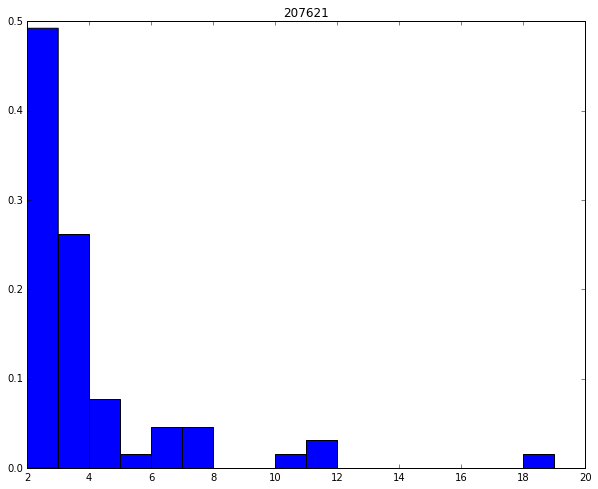

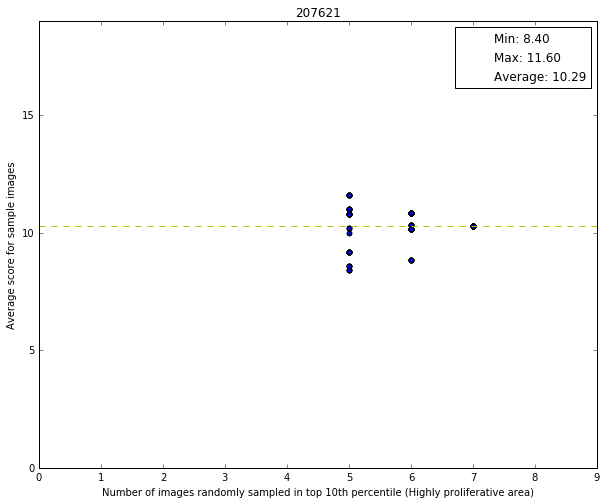

In [28]:
plt.hist(feat207621, bins=np.arange(min(feat207621), max(feat207621)+1, 1), normed=True)
plt.title('207621')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat207621:
    if i >= np.percentile(feat207621, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('207621')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

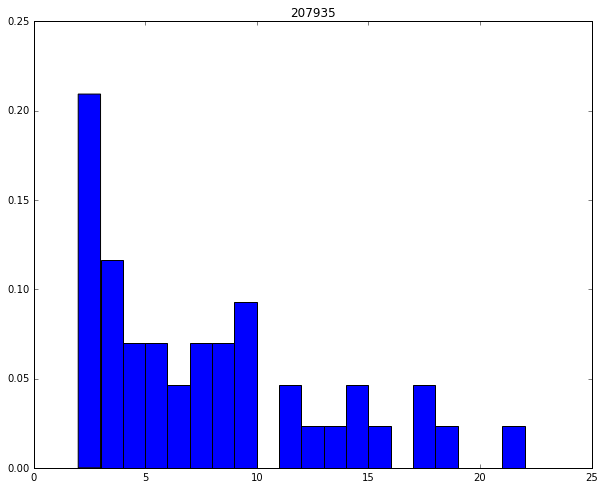

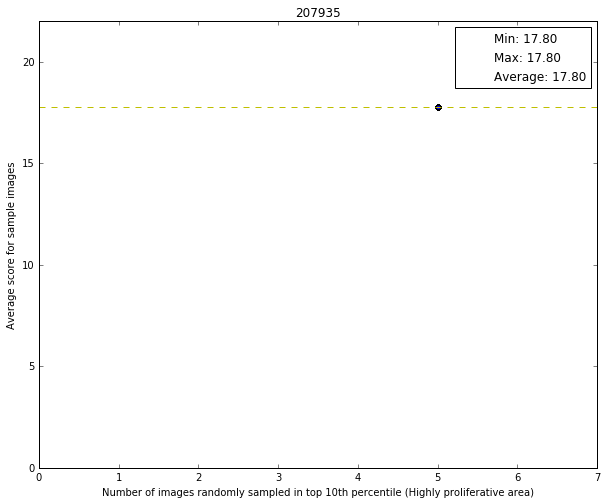

In [29]:
plt.hist(feat207935, bins=np.arange(min(feat207935), max(feat207935)+1, 1), normed=True)
plt.title('207935')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat207935:
    if i >= np.percentile(feat207935, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('207935')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

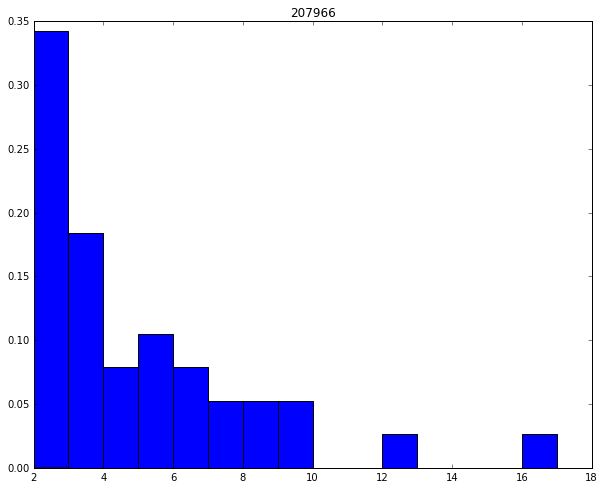

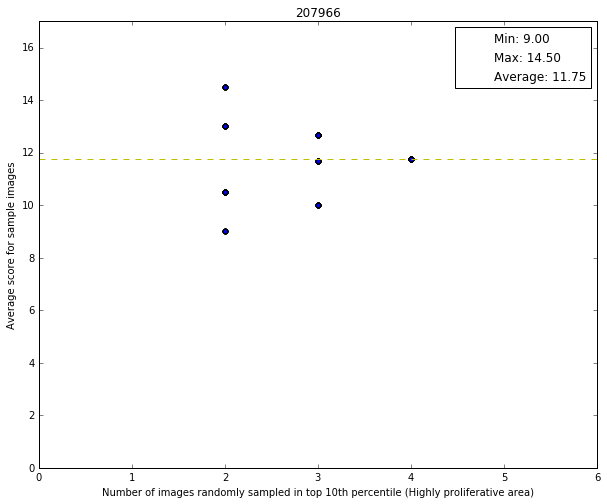

In [30]:
plt.hist(feat207966, bins=np.arange(min(feat207966), max(feat207966)+1, 1), normed=True)
plt.title('207966')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 2

for i in feat207966:
    if i >= np.percentile(feat207966, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('207966')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-1):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-2:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

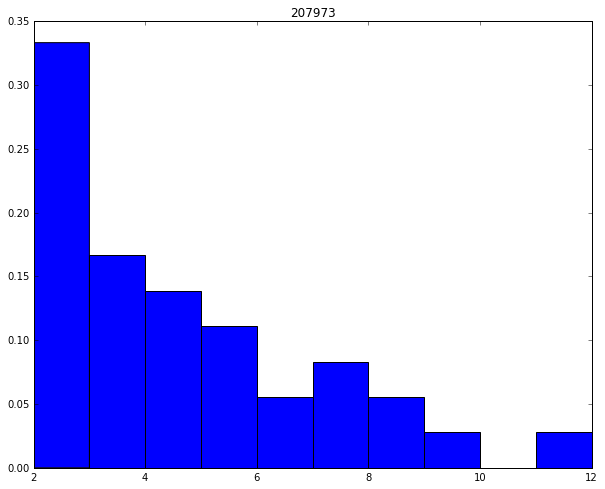

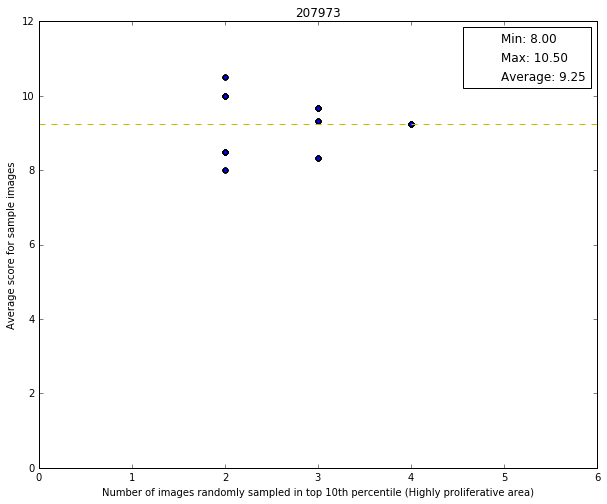

In [31]:
plt.hist(feat207973, bins=np.arange(min(feat207973), max(feat207973)+1, 1), normed=True)
plt.title('207973')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 2

for i in feat207973:
    if i >= np.percentile(feat207973, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('207973')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-1):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-2:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

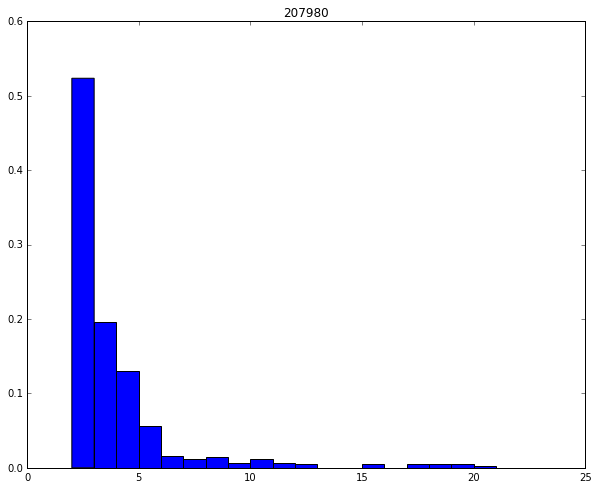

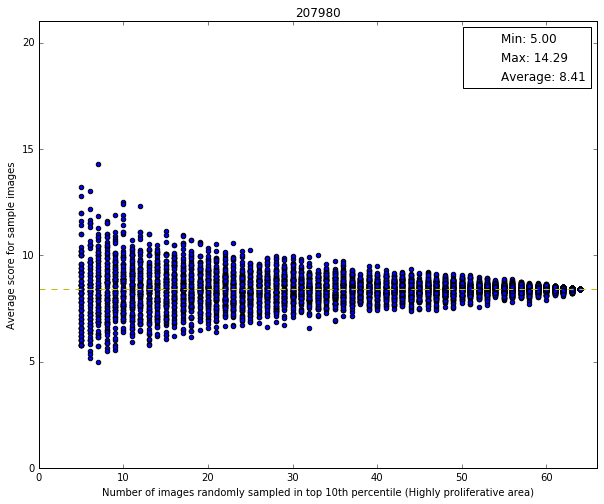

In [32]:
plt.hist(feat207980, bins=np.arange(min(feat207980), max(feat207980)+1, 1), normed=True)
plt.title('207980')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat207980:
    if i >= np.percentile(feat207980, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('207980')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

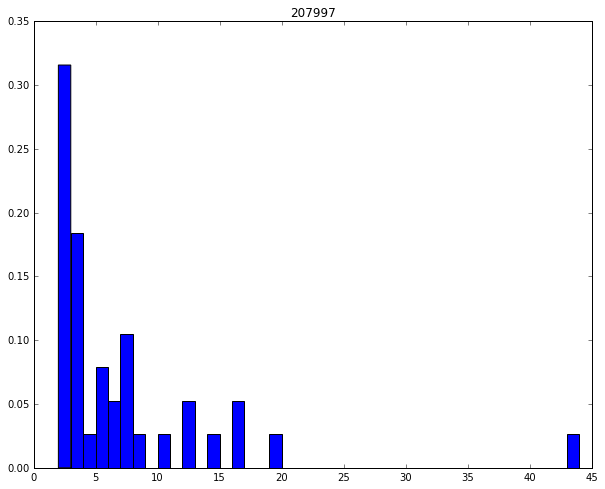

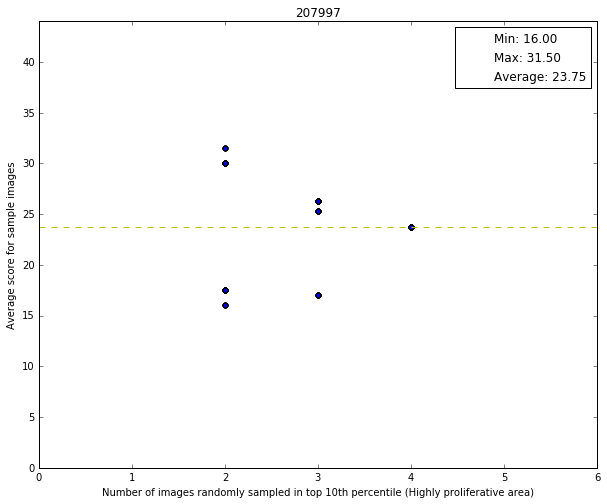

In [33]:
plt.hist(feat207997, bins=np.arange(min(feat207997), max(feat207997)+1, 1), normed=True)
plt.title('207997')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 2

for i in feat207997:
    if i >= np.percentile(feat207997, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('207997')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-1):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-2:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

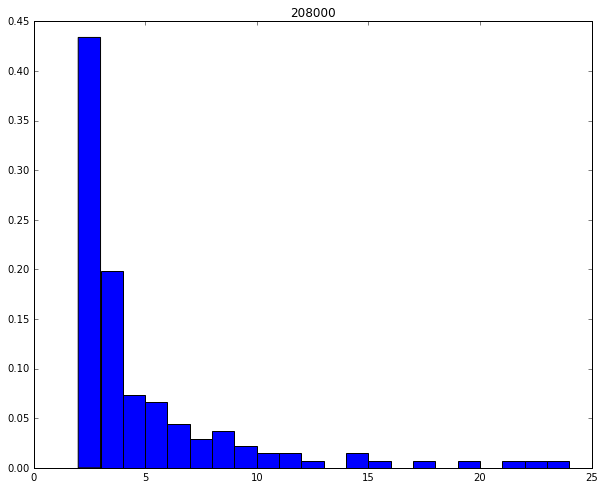

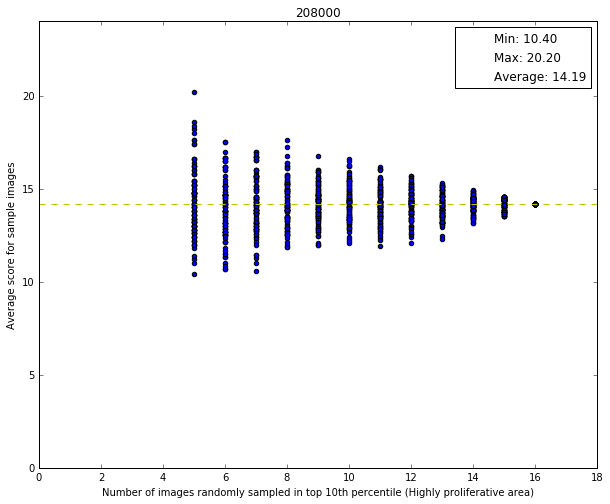

In [34]:
plt.hist(feat208000, bins=np.arange(min(feat208000), max(feat208000)+1, 1), normed=True)
plt.title('208000')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat208000:
    if i >= np.percentile(feat208000, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('208000')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

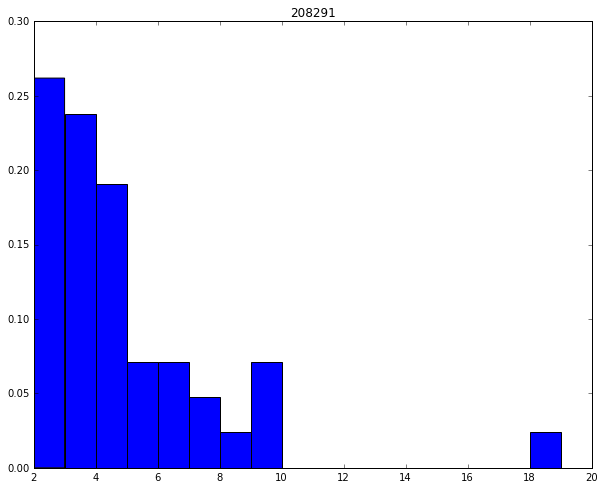

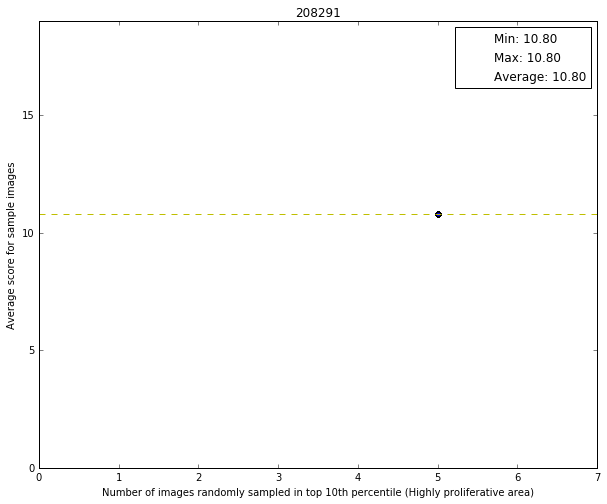

In [35]:
plt.hist(feat208291, bins=np.arange(min(feat208291), max(feat208291)+1, 1), normed=True)
plt.title('208291')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat208291:
    if i >= np.percentile(feat208291, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('208291')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

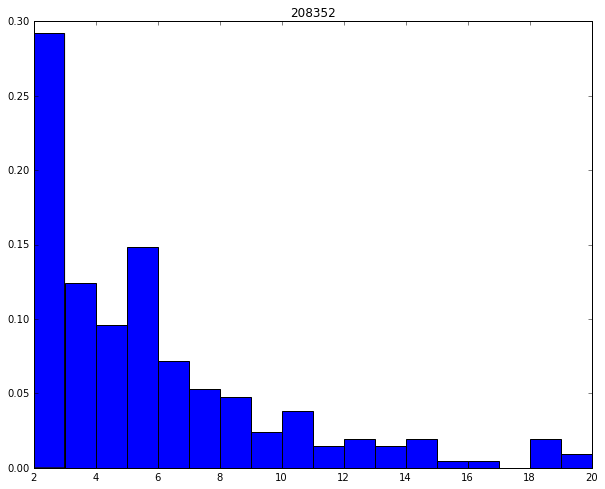

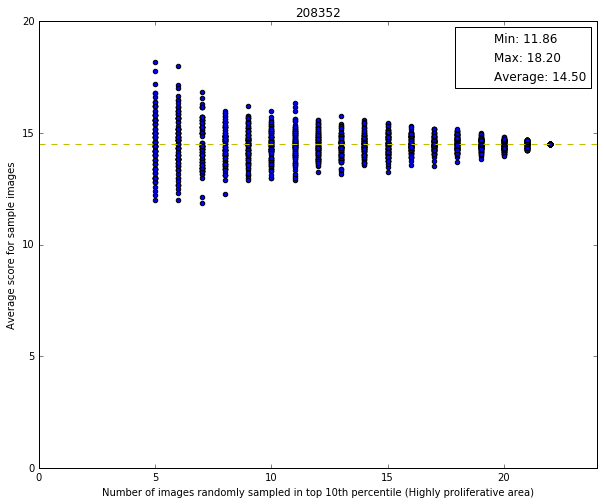

In [36]:
plt.hist(feat208352, bins=np.arange(min(feat208352), max(feat208352)+1, 1), normed=True)
plt.title('208352')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in feat208352:
    if i >= np.percentile(feat208352, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('208352')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

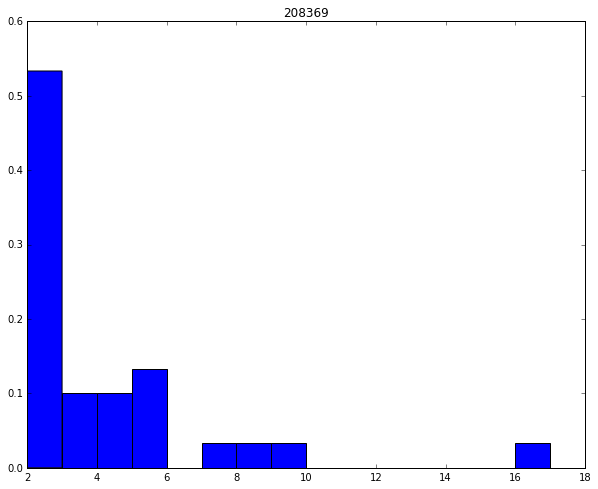

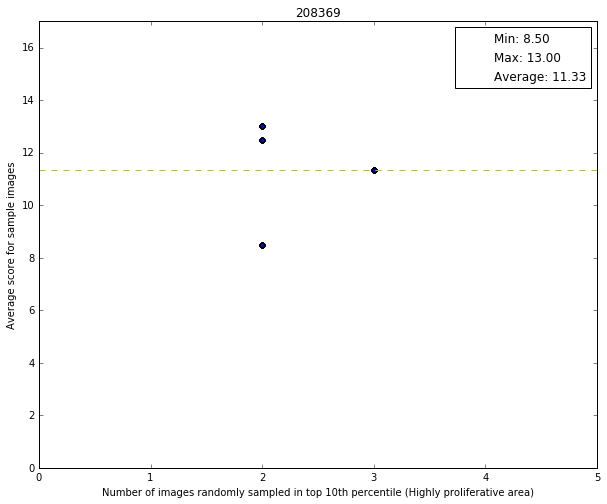

In [37]:
plt.hist(feat208369, bins=np.arange(min(feat208369), max(feat208369)+1, 1), normed=True)
plt.title('208369')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 2

for i in feat208369:
    if i >= np.percentile(feat208369, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('208369')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-1):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-2:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

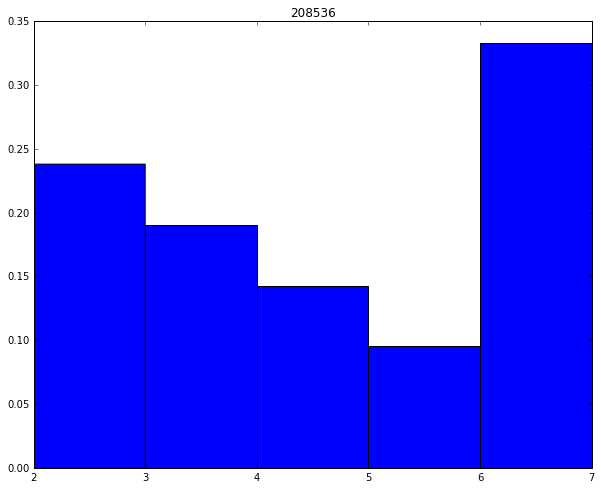

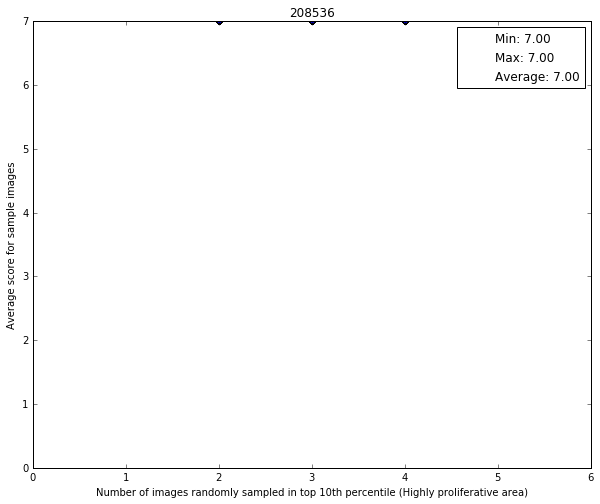

In [38]:
plt.hist(feat208536, bins=np.arange(min(feat208536), max(feat208536)+1, 1), normed=True)
plt.title('208536')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 2

for i in feat208536:
    if i >= np.percentile(feat208536, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('208536')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-1):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-2:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))

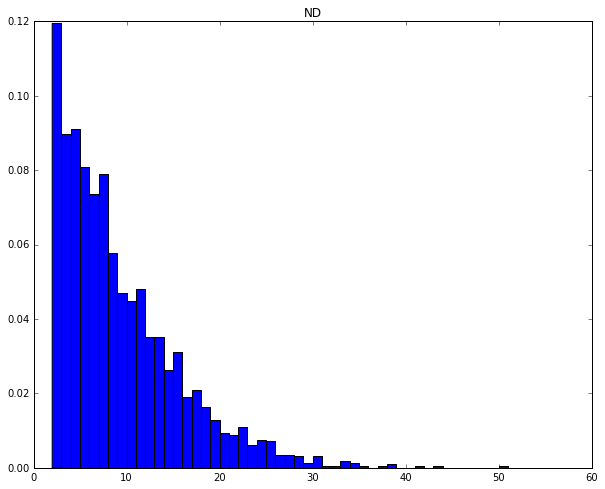

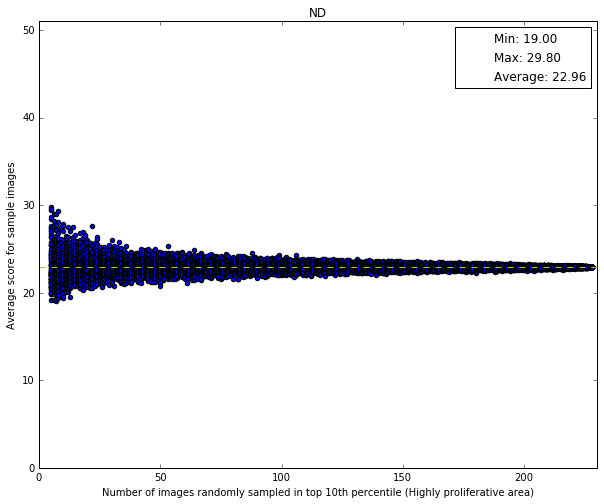

In [39]:
plt.hist(featND, bins=np.arange(min(featND), max(featND)+1, 1), normed=True)
plt.title('ND')

percentile_thresh = 90
num_tests = 100
high_per = []
average_sampling = []
start_size = 5

for i in featND:
    if i >= np.percentile(featND, percentile_thresh):
        high_per.append(i)

fig = plt.figure()
plt.axis([0,len(high_per)+2,0,max(high_per)])
plt.title('ND')
plt.xlabel('Number of images randomly sampled in top 10th percentile (Highly proliferative area)')
plt.ylabel('Average score for sample images')
plt.ion()
min_max_array = []
final_average = 0

for i in range(len(high_per)-4):
    for j in range(num_tests):
        testing_sample = np.random.choice(high_per, start_size, replace=False)
        average = np.mean(testing_sample)
        min_max_array.append(average)
        plt.scatter(start_size, average)
        if i == len(high_per)-5:
            final_average = average
    start_size+=1

plt.plot([0, len(high_per)+2], [final_average, final_average], 'y--')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
plt.legend([extra, extra, extra], ("Min: {0:.2f}".format(min(min_max_array)), "Max: {0:.2f}".format(max(min_max_array))
                                   , "Average: {0:.2f}".format(final_average)))